# Goal:
Do exploratory data analysis on NCAA basketball box score data.

Import packages

In [33]:
import pandas as pd
import numpy as np
import getpass
import psycopg2
import seaborn as sns
pd.set_option('display.max_columns', 500)

Initiate the connection to our database.

In [2]:
mypasswd = getpass.getpass()
conn = psycopg2.connect(database = 'cs20_group4',
                              user = 'mwkmr', # replace with pawprint
                              host = 'pgsql.dsa.lan',
                              password = mypasswd)
cursor = conn.cursor()

········


<h3>NCAA Player Career Stats<h3>

Query the ncaa career statistics from the `ncaa_player_career_stats` data table.

In [3]:
query = "SELECT * from ncaa_player_career_stats;"

In [4]:
player_career_stats = pd.read_sql_query(query, con = conn)


Calculate data completeness for each column for each season

In [7]:
data = pd.DataFrame()
for i in set(player_career_stats['season']):
    y = i
    x = 1-(player_career_stats[player_career_stats['season']==i].isnull().sum()/player_career_stats[player_career_stats['season']==i].shape[0])
    total = 1-(player_career_stats[player_career_stats['season']==i].isnull().sum().sum()/player_career_stats[player_career_stats['season']==i].size)
    x = pd.DataFrame(x)
    x = x.T
    x['season'] = y
    x['n_records'] = player_career_stats[player_career_stats['season']==i].shape[0]
    x['total_pct_complete'] = total
    x = x.set_index('season')
    data = data.append(x)
data

,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,player_name,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,player_season_number,n_records,total_pct_complete
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1992.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,1.0,1.0,1.000000,0.000000,1.0,0.000000,1.000000,1.0,1.000000,1.000000,0.600000,1.000000,0.000000,1.000000,1.000000,0.800000,0.800000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.0,5,0.640741
1993.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975000,1.000000,1.000000,0.275000,1.0,0.900000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,1.0,1.0,1.000000,0.000000,1.0,0.000000,1.000000,1.0,1.000000,1.000000,0.775000,1.000000,0.000000,1.000000,1.000000,0.800000,0.800000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.0,40,0.635648
1994.0,0.056604,0.990566,0.056604,0.990566,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.981132,0.990566,0.981132,0.990566,0.981132,0.990566,0.981132,0.990566,0.990566,0.216981,1.0,0.905660,0.000000,0.000000,0.000000,0.000000,0.801887,0.000000,1.0,1.0,0.990566,0.000000,1.0,0.000000,0.990566,1.0,0.981132,0.990566,0.773585,0.990566,0.056604,0.990566,0.981132,0.801887,0.801887,0.990566,0.981132,0.990566,0.056604,1.0,0.000000,0.000000,1.0,106,0.634521
1995.0,0.036458,1.000000,0.036458,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.963542,1.000000,1.000000,0.447917,1.0,0.942708,0.000000,0.000000,0.000000,0.000000,0.854167,0.000000,1.0,1.0,1.000000,0.000000,1.0,0.000000,1.000000,1.0,1.000000,1.000000,0.796875,1.000000,0.036458,1.000000,1.000000,0.854167,0.854167,1.000000,0.994792,1.000000,0.036458,1.0,0.000000,0.000000,1.0,192,0.645448
1996.0,0.037313,1.000000,0.037313,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.988806,1.000000,0.992537,1.000000,0.988806,0.996269,0.977612,0.996269,1.000000,0.458955,1.0,0.925373,0.000000,0.000000,0.000000,1.000000,0.847015,0.000000,1.0,1.0,1.000000,0.000000,1.0,0.000000,1.000000,1.0,0.988806,0.996269,0.794776,0.996269,0.037313,1.000000,0.992537,0.847015,0.847015,0.996269,0.988806,0.996269,0.037313,1.0,1.000000,0.925373,1.0,268,0.716487
1997.0,0.015038,1.000000,0.015038,1.000000,0.000000,1.0,0.000000,0.000000,0.005013,1.000000,0.989975,1.000000,0.989975,1.000000,0.989975,1.000000,0.964912,1.000000,1.000000,0.135338,1.0,0.483709,0.000000,0.000000,0.005013,1.000000,0.421053,0.000000,1.0,1.0,1.000000,0.000000,1.0,0.015038,1.000000,1.0,0.989975,1.000000,0.817043,1.000000,0.015038,1.000000,0.992481,0.426065,0.426065,1.000000,0.987469,1.000000,0.012531,1.0,1.000000,0.483709,1.0,399,0.670008
1998.0,0.011084,0.996305,0.011084,0.996305,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.985222,0.996305,0.985222,0.996305,0.985222,0.996305,0.954433,0.996305,0.996305,0.084975,1.0,0.077586,0.000000,0.000000,0.000000,1.000000,0.068966,0.

<h3>Player Box Scores<h3>

Let's read in our player box scores from the database. We need to split the queries in order to not exceed the memory allocated in the jupyterhub container.

In [8]:
query1 = "SELECT * from ncaa_player_boxscores where date <= '2015-01-01';"
query2 = "SELECT * from ncaa_player_boxscores where date >= '2015-01-01' and date <= '2016-01-01';"
query3 = "SELECT * from ncaa_player_boxscores where date >= '2016-01-01' and date <= '2017-01-01';"
query4 = "SELECT * from ncaa_player_boxscores where date >= '2017-01-01' and date <= '2018-01-01';"
query5 = "SELECT * from ncaa_player_boxscores where date >= '2018-01-01';"

Concatenate our queries together to build a cohesive dataframe.

In [9]:
player_box_scores = pd.DataFrame()
pbs1 = pd.read_sql_query(query1, con = conn)
pbs2 = pd.read_sql_query(query2, con = conn)
pbs3 = pd.read_sql_query(query3, con = conn)
pbs4 = pd.read_sql_query(query4, con = conn)
pbs5 = pd.read_sql_query(query5, con = conn)
player_box_scores = player_box_scores.append([pbs1,pbs2,pbs3,pbs4,pbs5])

Let's create a season year variable by extracting the year from our `date` column.

In [10]:
player_box_scores['season'] = pd.DatetimeIndex(player_box_scores['date']).year 

In [11]:
player_box_scores.describe()

,assist_percentage,assists,block_percentage,blocks,defensive_rating,defensive_rebound_percentage,defensive_rebounds,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,minutes_played,offensive_rating,offensive_rebound_percentage,offensive_rebounds,personal_fouls,points,steal_percentage,steals,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,season,player_game_number_season,player_game_number_career,player_game_number_team,days_since_last_game
count,1.026694e+06,1.036262e+06,1.026713e+06,1.036262e+06,1.026569e+06,1.026713e+06,1.036262e+06,913068.000000,1.036262e+06,913068.000000,1.036262e+06,913068.000000,1.036262e+06,558961.000000,1.036262e+06,1.036262e+06,965410.000000,1.026713e+06,1.036262e+06,1.036262e+06,1.036262e+06,1.026713e+06,1.036262e+06,913068.000000,1.036261e+06,605236.000000,1.036261e+06,1.026713e+06,1.036262e+06,929193.000000,954717.000000,1.036262e+06,1.036261e+06,835614.000000,1.036261e+06,1.026739e+06,1.036262e+06,1.036262e+06,1.036262e+06,1.036262e+06,1.036262e+06
mean,1.131995e-01,1.302005e+00,1.965279e-02,3.420631e-01,1.029811e+02,1.397147e-01,2.260266e+00,0.475010,5.588211e+00,0.421052,2.458271e+00,0.411999,2.024597e+00,0.667286,1.414585e+00,2.000586e+01,98.854763,5.967639e-02,9.067707e-01,1.823540e+00,7.008107e+00,1.700715e-02,6.282687e-01,0.340959,1.952743e+00,0.308712,6.769800e-01,1.006026e-01,3.167037e+00,0.508402,0.182132,1.254820e+00,3.635474e+00,0.470312,1.781294e+00,1.895111e-01,2.014616e+03,1.492087e+01,4.198736e+01,7.097962e+02,-4.376554e+00
std,1.521634e-01,1.748221e+00,5.253622e-02,7.688247e-01,1.926854e+01,1.373048e-01,2.217987e+00,0.312303,4.579290e+00,0.274813,2.415679e+00,0.636323,2.672155e+00,0.319978,2.078513e+00,1.130555e+01,52.551385,9.735698e-02,1.281937e+00,1.435915e+00,6.686871e+00,3.177441e-02,9.393519e-01,0.325865,2.466741e+00,0.314218,1.160209e+00,9.303655e-02,2.948392e+00,0.294553,0.208475,1.359363e+00,3.453955e+00,0.318920,2.023377e+00,1.071830e-01,2.614138e+00,9.226515e+00,3.202003e+01,4.038789e+03,8.139322e+01
min,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.300000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.000000,-2.000000e+00,0.000000e+00,2.010000e+03,1.000000e+00,1.000000e+00,1.000000e+00,-1.936000e+03
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+01,3.700000e-02,1.000000e+00,0.278000,2.000000e+00,0.250000,0.000000e+00,0.000000,0.000000e+00,0.500000,0.000000e+00,1.100000e+01,68.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,3.700000e-02,1.000000e+00,0.333000,0.000000,0.000000e+00,1.000000e+00,0.250000,0.000000e+00,1.250000e-01,2.012000e+03,7.000000e+00,1.600000e+01,1.400000e+01,3.000000e+00
50%,7.300000e-02,1.000000e+00,0.000000e+00,0.000000e+00,1.040000e+02,1.180000e-01,2.000000e+00,0.500000,5.000000e+00,0.429000,2.000000e+00,0.222000,1.000000e+00,0.714000,0.000000e+00,2.000000e+01,100.000000,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.300000,1.000000e+00,0.286000,0.000000e+00,8.500000e-02,2.000000e+00,0.512000,0.139000,1.000000e+00,3.000000e+00,0.500000,1.000000e+00,1.860000e-01,2.015000e+03,1.400000e+01,3.400000e+01,3.000000e+01,4.000000e+00
75%,1.830000e-01,2.000000e+00,0.000000e+00,0.000000e+00,1.160000e+02,2.040000e-01,3.000000e+00,0.667000,8.000000e+00,0.583000,4.000000e+00,0.571000,3.000000e+00,1.000000,2.000000e+00,2.900000e+01

In [12]:
player_box_scores.isnull().sum().sort_values(ascending=False)

free_throw_percentage              477301
three_point_percentage             431026
two_point_percentage               200648
free_throw_attempt_rate            123194
field_goal_percentage              123194
three_point_attempt_rate           123194
effective_field_goal_percentage    123194
true_shooting_percentage           107069
turnover_percentage                 81545
offensive_rating                    70852
team_abbr                           37389
defensive_rating                     9693
assist_percentage                    9568
defensive_rebound_percentage         9549
total_rebound_percentage             9549
offensive_rebound_percentage         9549
block_percentage                     9549
steal_percentage                     9549
usage_percentage                     9523
three_pointers                          1
three_point_attempts                    1
two_point_attempts                      1
two_pointers                            1
free_throws                       

Calculate data completeness for each column for each season

In [13]:
data = pd.DataFrame()
for i in set(player_box_scores['season']):
    y = i
    x = 1-(player_box_scores[player_box_scores['season']==i].isnull().sum()/player_box_scores[player_box_scores['season']==i].shape[0])
    total = 1-(player_box_scores[player_box_scores['season']==i].isnull().sum().sum()/player_box_scores[player_box_scores['season']==i].size)
    x = pd.DataFrame(x)
    x = x.T
    x['season'] = y
    x['n_records'] = player_box_scores[player_box_scores['season']==i].shape[0]
    x['total_pct_complete'] = total
    x = x.set_index('season')
    data = data.append(x).sort_values(by='season')
data

,player_id,assist_percentage,assists,block_percentage,blocks,defensive_rating,defensive_rebound_percentage,defensive_rebounds,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,minutes_played,offensive_rating,offensive_rebound_percentage,offensive_rebounds,personal_fouls,points,steal_percentage,steals,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,boxscore,team_abbr,venue,player_game_number_season,player_game_number_career,player_game_number_team,date,days_since_last_game,n_records,total_pct_complete
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,1.0,0.992304,1.0,0.992476,1.0,0.992476,0.992476,1.0,0.884079,1.0,0.884079,1.0,0.884079,1.0,0.546966,1.0,1.0,0.937005,0.992476,1.0,1.0,1.0,0.992476,1.0,0.884079,1.000000,0.554705,1.000000,0.992476,1.0,0.900679,0.926593,1.0,1.000000,0.815242,1.000000,0.992476,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,46385,0.959938
2011,1.0,0.989820,1.0,0.989829,1.0,0.989829,0.989829,1.0,0.876751,1.0,0.876751,1.0,0.876751,1.0,0.539217,1.0,1.0,0.930221,0.989829,1.0,1.0,1.0,0.989829,1.0,0.876751,1.000000,0.551898,1.000000,0.989829,1.0,0.892717,0.919989,1.0,1.000000,0.809262,1.000000,0.989829,1.0,0.964573,1.0,1.0,1.0,1.0,1.0,1.0,113559,0.957250
2012,1.0,0.989563,1.0,0.989608,1.0,0.989608,0.989608,1.0,0.875164,1.0,0.875164,1.0,0.875164,1.0,0.529439,1.0,1.0,0.927967,0.989608,1.0,1.0,1.0,0.989608,1.0,0.875164,1.000000,0.555904,1.000000,0.989608,1.0,0.890710,0.917458,1.0,1.000000,0.806359,1.000000,0.989608,1.0,0.963152,1.0,1.0,1.0,1.0,1.0,1.0,109992,0.956706
2013,1.0,0.990596,1.0,0.990648,1.0,0.990561,0.990648,1.0,0.877081,1.0,0.877081,1.0,0.877081,1.0,0.544757,1.0,1.0,0.929024,0.990648,1.0,1.0,1.0,0.990648,1.0,0.877081,1.000000,0.556414,1.000000,0.990648,1.0,0.893610,0.918654,1.0,1.000000,0.806688,1.000000,0.990648,1.0,0.964682,1.0,1.0,1.0,1.0,1.0,1.0,114954,0.957548
2014,1.0,0.989685,1.0,0.989574,1.0,0.989282,0.989574,1.0,0.873794,1.0,0.873794,1.0,0.873794,1.0,0.548348,1.0,1.0,0.925891,0.989574,1.0,1.0,1.0,0.989574,1.0,0.873794,1.000000,0.558036,1.000000,0.989574,1.0,0.890662,0.915431,1.0,1.000000,0.799926,1.000000,0.989797,1.0,0.963268,1.0,1.0,1.0,1.0,1.0,1.0,116437,0.956812
2015,1.0,0.990985,1.0,0.991130,1.0,0.990976,0.991130,1.0,0.881842,1.0,0.881842,1.0,0.881842,1.0,0.539905,1.0,1.0,0.932034,0.991130,1.0,1.0,1.0,0.991130,1.0,0.881842,0.999991,0.577534,0.999991,0.991130,1.0,0.897156,0.921742,1.0,0.999991,0.806506,0.999991,0.991130,1.0,0.964804,1.0,1.0,1.0,1.0,1.0,1.0,116691,0.958603
2016,1.0,0.990408,1.0,0.990366,1.0,0.990366,0.990366,1.0,0.884442,1.0,0.884442,1.0,0.884442,1.0,0.545772,1.0,1.0,0.933628,0.990366,1.0,1.0,1.0,0.990366,1.0,0.884442,1.000000,0.598380,1.000000,0.990366,1.0,0.900305,0.923520,1.0,1.000000,0.806713,1.000000,0.990366,1.0,0.964245,1.0,1.0,1.0,1.0,1.0,1.0,120096,0.959420
2017,1.0,0.993461,1.0,0.993512,1.0,0.993367,0.993512,1.0,0.886493,1.0,0.886493,1.0,0.886493,1.0,0.539108,1.0,1.0,0.935500,0.993512,1.0,1.0,1.0,0.993512,1.0,0.886493,1.000000,0.616458,1.000000,0.993512,1.0,0.901119,0.924776,1.0,1.000000,0.805818,1.000000,0.993512,1.0,0.963740,1.0,1.0,1.0,1.0,1.0,1.0,117596,0.960443
2018,1.0,0.991010,1.0,0.990975,1.0,0.990495,0.990975,1.0,0.887542,1.0,0.887542,1.0,0.887542,1.0,0.534035,1.0,1.0,0.935252,0.990975,1.0,1.0,1.0,0.990975,1.0,0.887542,1.000000,0.633595,1.000000,0.990975,1.0,0.902065,0.925223,1.0,1.000000,0.806458,1.000000,0.990975,1.0,0.962958,1.0,1.0,1.0,1.0,1.0,1.0,112575,0.960372


Almost all of the nulls are coming from rates, which does not indicate incomplete data, but rather no attempts.  For example if a player attempts no threes, he will have NaN for his three point shooting percentage.

<h3>Exploration</h3><br>Because the career stats is populated further into the past, it is probably the better choice for further use in predicting player success; it simply has more data.  Most of the columns are relatively complete post the 2000 season.  Therefore I will focus data exploration only on data from 2001 onward.  Columns that are not mostly populated, which are some of the advanced stats that don't appear until the 2010s, will be jettisoned.  This results in some unfortunate casulties, such as player_efficiency_rating, but on the whole there should still remain adequate data attributes for our purposes.

In [14]:
player_career_stats = player_career_stats[player_career_stats['season']>=2001]

In [22]:
drop_columns = ['box_plus_minus','defensive_box_plus_minus','defensive_rebound_percentage',
                'offensive_box_plus_minus','offensive_rebound_percentage','player_efficiency_rating',
                'points_produced','steal_percentage','total_rebound_percentage']

player_career_stats = player_career_stats.drop(labels=drop_columns, axis=1)

In [23]:
player_career_stats.head()

,assist_percentage,assists,block_percentage,blocks,conference,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_rebounds,offensive_win_shares,personal_fouls,player_id,player_name,points,position,season,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,player_season_number
0,0.049,20.0,0.006,7.0,atlantic-sun,79.0,0.3,0.573,245.0,0.478,117.0,0.269,66.0,0.697,46.0,29.0,29.0,76.0,845.0,33.0,1.9,35.0,antonio-cool-1,Antonio Cool,327.0,Forward,2005.0,24.0,jacksonville,0.473,116.0,0.405,47.0,112.0,0.592,0.173,58.0,129.0,0.543,70.0,0.190,190.0,2.2,0.104,1.0
1,NaN,41.0,NaN,5.0,atlantic-sun,75.0,-0.1,0.537,349.0,0.458,160.0,0.155,54.0,0.741,40.0,27.0,27.0,76.0,832.0,23.0,1.6,35.0,antonio-cool-1,Antonio Cool,415.0,Forward,2006.0,24.0,jacksonville,0.453,158.0,0.348,55.0,98.0,0.554,0.090,37.0,191.0,0.550,105.0,NaN,190.0,1.5,0.072,2.0
2,0.043,2.0,0.025,2.0,atlantic-10,6.0,0.0,0.404,26.0,0.269,7.0,0.154,4.0,0.750,3.0,15.0,0.0,78.0,87.0,5.0,0.0,19.0,jake-fay-1,Jake Fay,24.0,Guard,2014.0,2.0,hartford,0.808,21.0,0.333,7.0,11.0,0.430,0.152,5.0,5.0,0.000,0.0,0.181,195.0,0.0,0.003,1.0
3,0.079,1.0,0.000,0.0,america-east,1.0,0.0,0.000,9.0,0.000,0.0,0.000,0.0,NaN,0.0,10.0,0.0,78.0,22.0,1.0,-0.2,0.0,jake-fay-1,Jake Fay,0.0,Guard,2016.0,1.0,hartford,0.667,6.0,0.000,0.0,2.0,0.000,0.182,2.0,3.0,0.000,0.0,0.260,195.0,-0.2,-0.365,2.0
4,0.000,0.0,0.067,1.0,america-east,0.0,0.0,0.000,6.0,0.000,0.0,0.000,0.0,NaN,0.0,8.0,0.0,78.0,15.0,1.0,-0.1,0.0,jake-fay-1,Jake Fay,0.0,Guard,2017.0,1.0,hartford,0.667,4.0,0.000,0.0,1.0,0.000,0.143,1.0,2.0,0.000,0.0,0.236,195.0,-0.1,-0.308,3.0


In [24]:
player_career_stats.describe()

,assist_percentage,assists,block_percentage,blocks,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_rebounds,offensive_win_shares,personal_fouls,points,season,steals,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,player_season_number
count,66963.000000,85698.000000,66961.000000,85697.000000,85414.000000,85516.000000,83489.000000,85698.000000,83489.000000,85698.000000,83489.000000,85698.000000,77615.000000,85698.000000,85696.000000,85415.000000,85738.000000,81325.000000,85414.000000,85516.000000,85419.000000,85699.000000,85738.000000,85697.000000,83489.000000,85698.000000,67732.000000,85698.000000,85698.000000,83852.000000,84081.000000,85453.000000,85698.000000,81822.000000,85698.000000,66952.000000,85738.000000,85516.000000,80926.000000,85738.000000
mean,0.113395,31.556746,0.017119,8.021844,52.651837,0.614356,0.465393,132.757404,0.414825,58.341397,0.402093,48.628113,0.648536,33.757754,23.883483,11.836129,76.841645,479.849370,22.824853,0.622476,43.990213,166.062953,2010.249376,15.763142,0.325262,45.021739,0.289435,15.620820,75.352470,0.494941,0.192512,31.930207,87.735665,0.457130,42.720577,0.188196,205.012398,1.238396,0.072420,2.109776
std,0.093760,37.363757,0.026655,13.057992,47.208474,0.651677,0.157155,121.982526,0.145151,55.621510,0.368352,50.145865,0.182307,37.106958,10.069391,12.596684,3.562781,361.017497,23.970021,0.951143,30.725214,159.588335,5.457459,15.532870,0.271746,58.620144,0.172113,21.994333,68.263162,0.146505,0.114204,27.148851,86.478348,0.161729,44.656121,0.070578,26.177338,1.439483,0.122464,1.083101
min,-2.837000,0.000000,0.000000,0.000000,-1.000000,-1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,60.000000,0.000000,0.000000,-2.400000,0.000000,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,-2.400000,-5.297000,1.000000
25%,0.051000,4.000000,0.001000,0.000000,12.000000,0.100000,0.417000,25.000000,0.360000,10.000000,0.222000,8.000000,0.560000,5.000000,17.000000,0.000000,74.000000,128.000000,4.000000,0.000000,15.000000,27.000000,2006.000000,3.000000,0.034000,1.000000,0.214000,0.000000,17.000000,0.452000,0.135000,8.000000,15.000000,0.400000,6.000000,0.147000,185.000000,0.100000,0.033000,1.000000
50%,0.096000,18.000000,0.008000,3.000000,44.000000,0.400000,0.484000,101.000000,0.421000,43.000000,0.347000,33.000000,0.673000,21.000000,28.000000,6.000000,77.000000,457.000000,15.000000,0.200000,45.000000,120.000000,2010.000000,12.000000,0.319000,17.000000,0.319000,5.000000,61.000000,0.514000,0.175000,27.000000,62.000000,0.470000,28.000000,0.184000,203.000000,0.700000,0.082000,2.000000
75%,0.157000,46.000000,0.023000,10.000000,80.000000,0.900000,0.536000,213.000000,0.487000,94.000000,0.500000,74.000000,0.763000,51.000000,31.000000,25.000000,80.000000,789.000000,34.000000,1.000000,68.000000,267.000000,2015.000000,24.000000,0.522000,72.000000,0.376000,24.000000,113.000000,0.564000,0.230000,50.000000,137.000000,0.531000,66.000000,0.225000,221.000000,2.000000,0.127000,3.000000
max,1.000000,351.000000,1.000000,196.000000,389.000000,6.700000,1.500000,765.000000,1.000000,346.000000,10.000000,377.000000,1.000000,312.000000,41.000000,41.000000,91.000000,1543.000000,200.000000,7.300000,148.000000,1068.000000,2019.000000,160.000000,1.000000,395.000000,1.000000,162.000000,508.000000,1.500000,1.000000,170.000000,678.000000,1.000000,333.000000,1.000000,380.000000,11.300000,4.314000,6.000000


## Histograms

Distribution for number of seasons played by a NCAA player

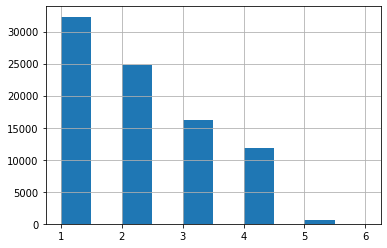

In [26]:
player_career_stats.player_season_number.hist()

Distribution for NCAA players' true shooting percentage

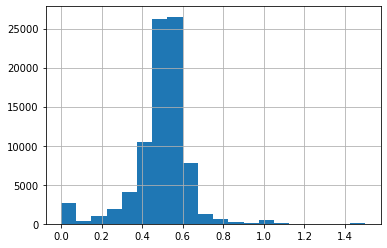

In [30]:
player_career_stats.true_shooting_percentage.hist(bins=20)

Distribution for NCAA player height

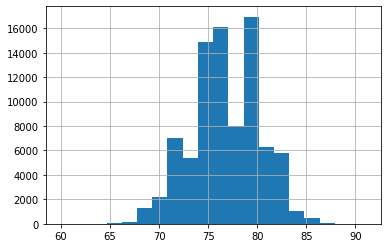

In [31]:
player_career_stats.height.hist(bins=20)

Distribution for NCAA player weight

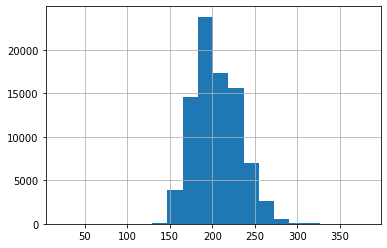

In [32]:
player_career_stats.weight.hist(bins=20)

Distribution for minutes player by a player over their career in the NCAA.

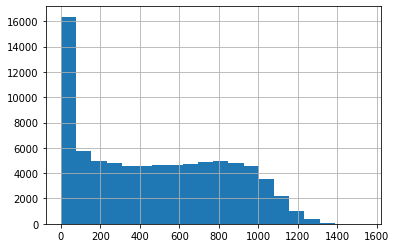

In [47]:
player_career_stats.minutes_played.hist(bins=20)

Distribution for the number of games started by NCAA players

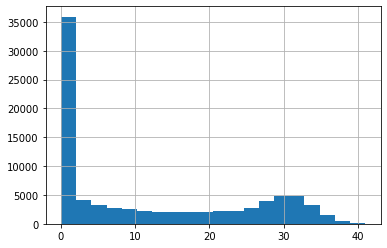

In [48]:
player_career_stats.games_started.hist(bins=20)

Distribution for the points scored by NCAA players

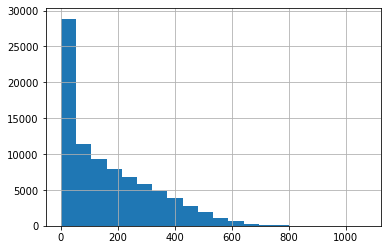

In [49]:
player_career_stats.points.hist(bins=20)

Distribution for the number of threes attempted by NCAA players

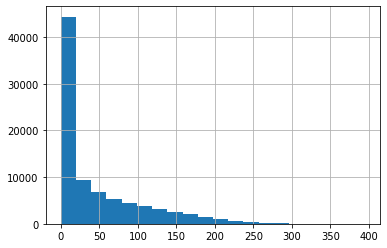

In [50]:
player_career_stats.three_point_attempts.hist(bins=20)

Distribution for the number of threes made by NCAA players

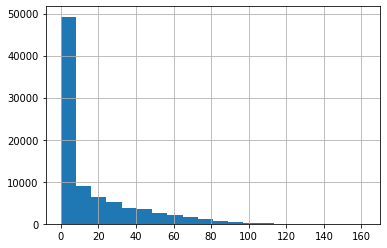

In [53]:
player_career_stats.three_pointers.hist(bins=20)